In [1]:
import pandas as pd

# Load the dataset
file_path = 'merged_amazon_data.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data.info()

# Display the first few rows of the dataset
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426336 entries, 0 to 1426335
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426336 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426336 non-null  object 
 3   productURL         1426336 non-null  object 
 4   stars              1426336 non-null  float64
 5   reviews            1426336 non-null  int64  
 6   price              1426336 non-null  float64
 7   listPrice          1426336 non-null  float64
 8   category_id        1426336 non-null  int64  
 9   isBestSeller       1426336 non-null  bool   
 10  boughtInLastMonth  1426336 non-null  int64  
 11  category_name      1426336 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(5)
memory usage: 121.1+ MB


,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth,category_name
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000,Suitcases
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000,Suitcases
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300,Suitcases
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400,Suitcases
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400,Suitcases


Based on the dataset, we can formulate several questions:

- What are the most popular products?
- Which products are often bought together?
- What are the top-rated products?
- Which users are most active in terms of reviews and purchases?
- Can we recommend products to users based on their past behavior?

#### Data Preprocessing and Transformation

In [2]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Drop rows with missing values (if any)
data_cleaned = data.dropna()

# Display the cleaned dataset
data_cleaned.info()


asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
category_name        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426336 entries, 0 to 1426335
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426336 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426336 non-null  object 
 3   productURL         1426336 non-null  object 
 4   stars              1426336 non-null  float64
 5   reviews            1426336 non-null  int64  
 6   price              1426336 non-null  float64
 7   listPrice          1426336 non-null  float64
 8   category_id        1426336 non-null  int64  
 9   isBestSeller       1426336 non-null  bool  

C:\Users\vacha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


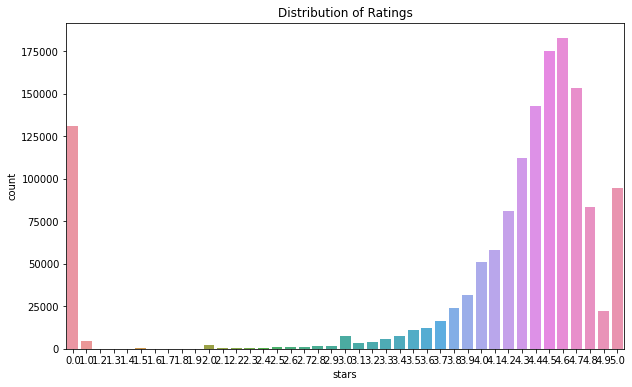

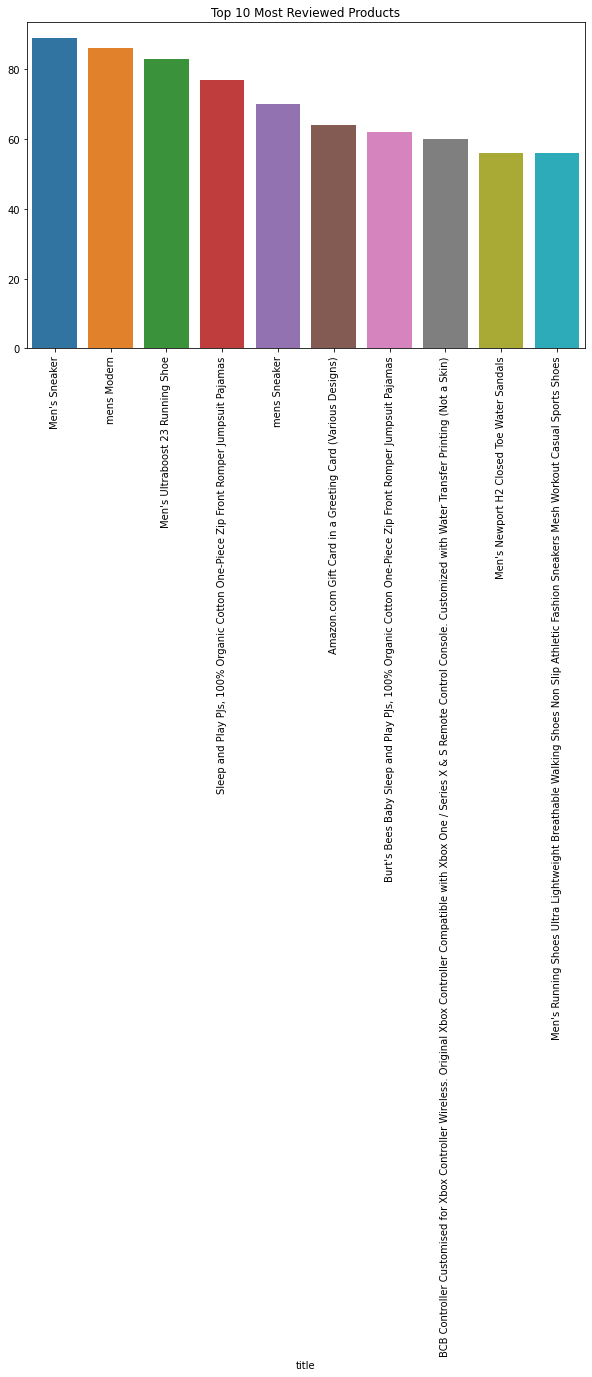

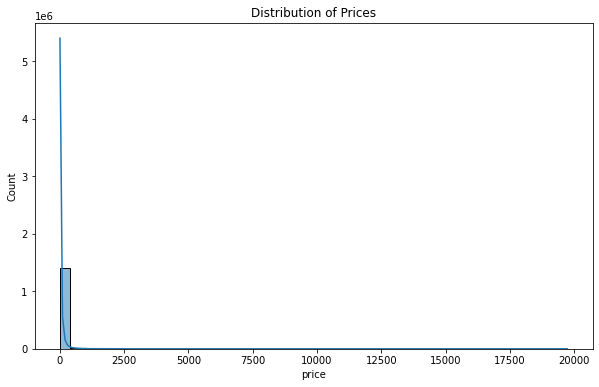

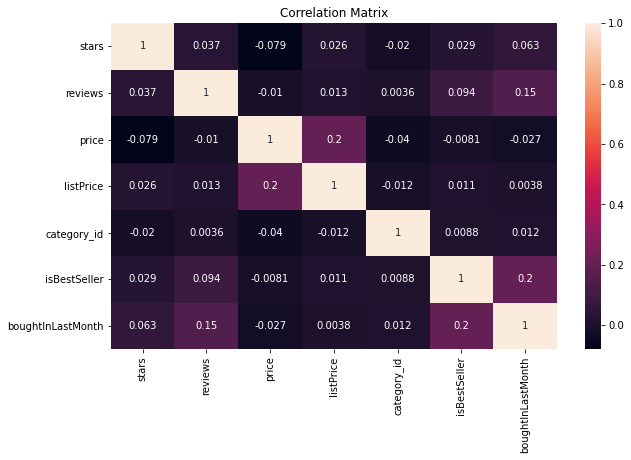

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data_cleaned['stars'])
plt.title('Distribution of Ratings')
plt.show()

# Top 10 most reviewed products
top_products = data_cleaned['title'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.index, y=top_products.values)
plt.title('Top 10 Most Reviewed Products')
plt.xticks(rotation=90)
plt.show()

# Distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['price'], bins=50, kde=True)
plt.title('Distribution of Prices')
plt.show()

# Correlation matrix - only include numeric columns
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64', 'bool']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[numeric_columns].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()


The visualizations indicate that the price distribution is highly skewed, and the correlation matrix provides insights into the relationships between different numerical features.

To handle the skewed price distribution, we might consider applying transformations such as log transformation for better analysis and modeling.

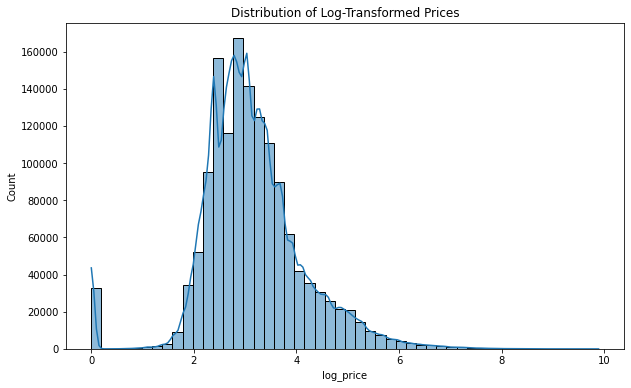

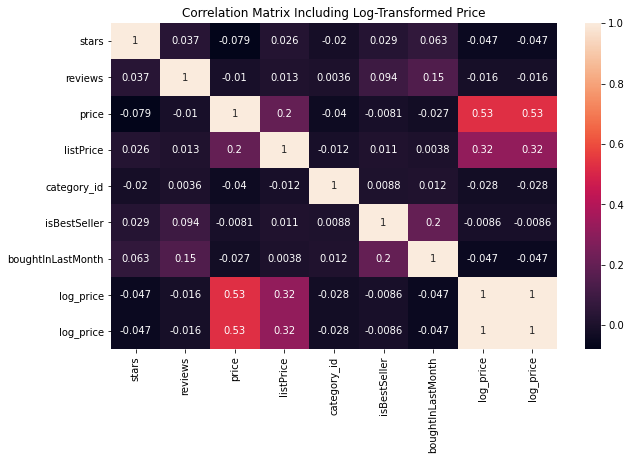

In [7]:
import numpy as np

# Apply log transformation to price
data_cleaned['log_price'] = np.log1p(data_cleaned['price'])

# Distribution of log-transformed prices
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['log_price'], bins=50, kde=True)
plt.title('Distribution of Log-Transformed Prices')
plt.show()

# Correlation matrix including log-transformed price
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64', 'bool']).columns
numeric_columns = numeric_columns.append(pd.Index(['log_price']))
plt.figure(figsize=(10, 6))
sns.heatmap(data_cleaned[numeric_columns].corr(), annot=True)
plt.title('Correlation Matrix Including Log-Transformed Price')
plt.show()


In [9]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data_cleaned[['asin', 'stars']], reader)

# Use SVD for collaborative filtering
svd = SVD()

# Cross-validation
cross_val_results = cross_validate(svd, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(cross_val_results)

# Train the model on the full dataset
trainset = data_surprise.build_full_trainset()
svd.fit(trainset)


ValueError: not enough values to unpack (expected 3, got 2)

In [10]:
# Create a placeholder user ID column
data_cleaned['user_id'] = np.arange(len(data_cleaned))

# Prepare the data for Surprise
reader = Reader(rating_scale=(1, 5))
data_surprise = Dataset.load_from_df(data_cleaned[['user_id', 'asin', 'stars']], reader)

# Use SVD for collaborative filtering
svd = SVD()

# Cross-validation
cross_val_results = cross_validate(svd, data_surprise, measures=['RMSE', 'MAE'], cv=5, verbose=True)
print(cross_val_results)

# Train the model on the full dataset
trainset = data_surprise.build_full_trainset()
svd.fit(trainset)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.3421  1.3371  1.3469  1.3480  1.3474  1.3443  0.0042  
MAE (testset)     0.8400  0.8367  0.8420  0.8426  0.8423  0.8407  0.0022  
Fit time          69.25   60.16   62.97   58.59   54.42   61.08   4.93    
Test time         22.28   5.33    8.63    8.52    6.37    10.23   6.16    
{'test_rmse': array([1.34213996, 1.33705545, 1.34692894, 1.34795099, 1.34736347]), 'test_mae': array([0.83995102, 0.83672815, 0.84204462, 0.84259961, 0.84229211]), 'fit_time': (69.24550008773804, 60.155649185180664, 62.9734570980072, 58.58757257461548, 54.42140316963196), 'test_time': (22.282450437545776, 5.332914590835571, 8.629585981369019, 8.522992134094238, 6.368720054626465)}


The cross-validation results show the performance of the SVD algorithm on the dataset with the following metrics:

- RMSE (Root Mean Squared Error): The mean RMSE across 5 folds is approximately 1.3443.
- MAE (Mean Absolute Error): The mean MAE across 5 folds is approximately 0.8407.

These values indicate the average error between the predicted ratings and the actual ratings. Generally, lower RMSE and MAE values are better, indicating that the model's predictions are closer to the actual ratings.

In [12]:
# Streamlit application
st.title('Product Recommendation System')

product_id = st.text_input('Enter Product ID')

if product_id:
    try:
        # Create a dummy user to represent the product ID
        dummy_user_id = len(data_cleaned) + 1
        product_inner_id = trainset.to_inner_uid(dummy_user_id)
        recommendations = []
        
        for item_id in trainset.all_items():
            asin = trainset.to_raw_iid(item_id)
            estimated_rating = svd.predict(dummy_user_id, item_id).est
            recommendations.append((asin, estimated_rating))
        
        recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:10]
        
        st.write('Top 10 Recommendations:')
        for asin, rating in recommendations:
            st.write(f'ASIN: {asin}, Estimated Rating: {rating}')
    except ValueError:
        st.write("Product ID not found in the dataset")

NameError: name 'st' is not defined